# Stock Prediction using Numerical &Textual Analysis
## Author: Ahmed Hamdi
## introduction
Stock market prediction and analysis are some of the most difficult jobs to complete. There are numerous causes for this, including market volatility and a variety of other dependent and independent variables that influence the value of a certain stock in the market. These variables make it extremely difficult for any stock market expert to anticipate the rise and fall of the market with great precision.
However, with the introduction of Machine Learning and its strong algorithms, the most recent market research and Stock Market Prediction advancements have begun to include such approaches in analyzing stock market data.
### Objective:
#### Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.
#### Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
* Download historical stock prices from finance.yahoo.com
* Download textual (news) data from https://bit.ly/36fFPI6

## import the necessary modules, the BSESN and News-Headlines data:

In [1]:
!pip install 'scikit-learn==0.24.0' # Have to use this version of scikit-learn, for mean_absolute_error 

import pandas as pd
import numpy as np
import yfinance as yf
from numpy import concatenate
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ERROR: Invalid requirement: "'scikit-learn==0.24.0'"

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\E-M-
[nltk_data]     W-E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\E-M-
[nltk_data]     W-E\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
s1 = "2019-12-17" 
en1= "2022-03-31"
df_prices = yf.download('^BSESN', start=s1, end=en1,progress=False)

df_prices.to_csv('bse.csv',index=False)
df_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000
2019-12-18,41442.750000,41614.769531,41358.468750,41558.570312,41558.570312,24300
2019-12-19,41571.820312,41719.289062,41456.398438,41673.921875,41673.921875,33300
2019-12-20,41746.199219,41809.960938,41636.109375,41681.539062,41681.539062,33600
2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200
...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300


In [20]:
import datetime as dt
testdf =yf.download('^BSESN', start=en1, end=dt.datetime.now(),progress=False)
testdf.to_csv('bse_test.csv',index=False)

## prepare data for RNN model

In [21]:
training_set = df_prices.iloc[:, 1:2].values
training_set

array([[41401.6484375 ],
       [41614.76953125],
       [41719.2890625 ],
       [41809.9609375 ],
       [41701.62109375],
       [41702.98046875],
       [41543.80078125],
       [41611.26953125],
       [41714.73046875],
       [41607.48828125],
       [41649.2890625 ],
       [41636.1796875 ],
       [41378.33984375],
       [41230.140625  ],
       [40866.359375  ],
       [41482.12109375],
       [41775.109375  ],
       [41899.62890625],
       [41994.26171875],
       [41969.859375  ],
       [42059.44921875],
       [42063.9296875 ],
       [42273.87109375],
       [41532.58984375],
       [41532.2890625 ],
       [41413.9609375 ],
       [41697.03125   ],
       [41516.26953125],
       [41333.25      ],
       [41334.859375  ],
       [41380.140625  ],
       [41154.48828125],
       [40014.8984375 ],
       [40818.94140625],
       [41177.        ],
       [41405.4296875 ],
       [41394.41015625],
       [41172.05859375],
       [41444.33984375],
       [41671.859375  ],


In [23]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [24]:
X_train = []
y_train = []
for i in range(60, 566):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16/16 [==============================] - 8s 81ms/step - loss: 0.0992
Epoch 2/100
16/16 [==============================] - 1s 68ms/step - loss: 0.0176
Epoch 3/100
16/16 [==============================] - 1s 65ms/step - loss: 0.0095
Epoch 4/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0078
Epoch 5/100
16/16 [==============================] - 1s 65ms/step - loss: 0.0083
Epoch 6/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0078
Epoch 7/100
16/16 [==============================] - 1s 65ms/step - loss: 0.0071
Epoch 8/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0077
Epoch 9/100
16/16 [==============================] - 1s 72ms/step - loss: 0.0070
Epoch 10/100
16/16 [==============================] - 1s 69ms/step - loss: 0.0073
Epoch 11/100
16/16 [==============================] - 1s 69ms/step - loss: 0.0074
Epoch 12/100
16/16 [==============================] - 1s 69ms/step - loss: 0.0069
Epoch 13/100
16/16 [=====

In [28]:
dataset_total = pd.concat((df_prices['Open'], testdf['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdf) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 213):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 1s 24ms/step


In [30]:
real_stock_price = testdf.iloc[:, 1:2].values

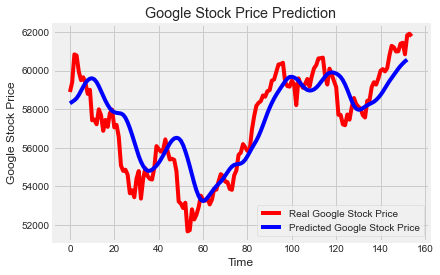

In [31]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [3]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news = df_news.dropna(axis = 0, how ='any') 
df_news

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


## Cleaning and Pre-processing the data:

In [4]:
# Dropping 0 values, and the Category column as we don't require this for our analysis.
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)

In [5]:
# Converting 'Date' columns from both our dataframes to type datetime
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news = df_news.drop(df_news[df_news.Date<'2019-12-17'].index)
df_news

,Date,News
3233971,2019-12-17,After Jagannath Temple; Puri beach devpt plan ...
3233972,2019-12-17,Caffeine high for self-help group from Koraput
3233973,2019-12-17,Chaos mars FASTag debut at toll plazas
3233974,2019-12-17,After breather; onion inches back to Rs 120/kg
3233975,2019-12-17,Water board to handle sewer woes in surroundin...
...,...,...
3650966,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650967,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [6]:
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2019-12-17,After Jagannath Temple; Puri beach devpt plan ...
1,2019-12-18,What is Citizenship (Amendment) Bill 2019: All...
2,2019-12-19,Only 61% of CCA covered after revamp of canals...
3,2019-12-20,I'm done playing the good girl; I want to be a...
4,2019-12-21,first cold wave in kolkata since 2013 may pull...
...,...,...
831,2022-03-27,Playing a dead man in Body God meant sitting i...
832,2022-03-28,As fashion becomes democratic; demand for styl...
833,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
834,2022-03-30,I will not give in to trends: Dossmode The tim...


In [7]:
# Cleaning headlines
c = []

for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    print(i)
    news=' '.join(news)
    c.append(news)    
    # news = [word for word in news if word not in set(stopwords.words('english'))]
    # print(news)
    # news = []
    # for w in news: news.append(ps.stem(w))
    # print(news)
    # news=' '.join(news)
    # print(news)
    # c.append(news)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
df_news['News'] = pd.Series(c)
df_news

C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/71273463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['News'] = pd.Series(c)


,Date,News
0,2019-12-17,jagannath templ puri beach devpt plan of caffe...
1,2019-12-18,citizenship amend bill need know rs crore gst ...
2,2019-12-19,cca cover revamp canal cag perform bengaluru a...
3,2019-12-20,done play good girl want baddi amrita rao belg...
4,2019-12-21,first cold wave kolkata sinc may pull mercuri ...
...,...,...
831,2022-03-27,play dead man bodi god meant sit refriger guru...
832,2022-03-28,fashion becom democrat demand stylist soar las...
833,2022-03-29,bobbi deol like dad hope work age yasha surya ...
834,2022-03-30,give trend dossmod time gave boyfriend incred ...


## Calculating Subjectivity and Polarity scores using TextBlob module:

In [9]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [10]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/1226800301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/1226800301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Polarity'] = df_news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2019-12-17,jagannath templ puri beach devpt plan of caffe...,0.360265,0.046818
1,2019-12-18,citizenship amend bill need know rs crore gst ...,0.350364,0.049026
2,2019-12-19,cca cover revamp canal cag perform bengaluru a...,0.340586,0.043306
3,2019-12-20,done play good girl want baddi amrita rao belg...,0.340733,0.043654
4,2019-12-21,first cold wave kolkata sinc may pull mercuri ...,0.402374,0.079806
...,...,...,...,...
831,2022-03-27,play dead man bodi god meant sit refriger guru...,0.356716,0.087855
832,2022-03-28,fashion becom democrat demand stylist soar las...,0.382331,0.079270
833,2022-03-29,bobbi deol like dad hope work age yasha surya ...,0.372864,0.083037
834,2022-03-30,give trend dossmod time gave boyfriend incred ...,0.330696,0.052339


## Carrying out Sentimental Analysis on the News Headlines:

In [11]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/2572001898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/2572001898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
C:\Users\E-M-W-E\AppData\Local\Temp/ipykernel_9528/2572001898.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-12-17,jagannath templ puri beach devpt plan of caffe...,0.360265,0.046818,-0.9999,0.175,0.760,0.065
1,2019-12-18,citizenship amend bill need know rs crore gst ...,0.350364,0.049026,-0.9998,0.144,0.786,0.070
2,2019-12-19,cca cover revamp canal cag perform bengaluru a...,0.340586,0.043306,-0.9999,0.155,0.778,0.067
3,2019-12-20,done play good girl want baddi amrita rao belg...,0.340733,0.043654,-0.9998,0.150,0.781,0.068
4,2019-12-21,first cold wave kolkata sinc may pull mercuri ...,0.402374,0.079806,-0.9998,0.157,0.766,0.076
...,...,...,...,...,...,...,...,...
831,2022-03-27,play dead man bodi god meant sit refriger guru...,0.356716,0.087855,-0.9999,0.149,0.782,0.069
832,2022-03-28,fashion becom democrat demand stylist soar las...,0.382331,0.079270,-0.9998,0.144,0.778,0.078
833,2022-03-29,bobbi deol like dad hope work age yasha surya ...,0.372864,0.083037,-0.9997,0.129,0.799,0.072
834,2022-03-30,give trend dossmod time gave boyfriend incred ...,0.330696,0.052339,-0.9998,0.139,0.794,0.067


## We will use our **Sentimental Analysis findings** along with the historical prices data for predicting stock prices **using Multivariate Time Series Forecasting**:


In [12]:
# Merging our findings (the updated News dataframe) with the Prices dataframe
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
print(df_prices)
df_merge.drop('Date', axis = 1, inplace=True)
df_merge.drop('News', axis=1, inplace=True)
print(df_merge.columns)
print(len(df_merge))
print(len(df_prices))
print(len(df_news))

                    Open          High           Low         Close  \
Date                                                                 
2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
2019-12-18  41442.750000  41614.769531  41358.468750  41558.570312   
2019-12-19  41571.820312  41719.289062  41456.398438  41673.921875   
2019-12-20  41746.199219  41809.960938  41636.109375  41681.539062   
2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   
...                  ...           ...           ...           ...   
2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

               Adj Close  Volume  
Date                              
2019-12-17  41352.1

In [13]:
# getting our data series ready for Multivariate Time Series Forecasting
from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [14]:
# scale our data for optimal performance
values = df_merge.values
print(df_merge)
print(values)
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

             Open          High           Low         Close     Adj Close  \
0    41052.359375  41401.648438  41005.179688  41352.171875  41352.171875   
1    41442.750000  41614.769531  41358.468750  41558.570312  41558.570312   
2    41571.820312  41719.289062  41456.398438  41673.921875  41673.921875   
3    41746.199219  41809.960938  41636.109375  41681.539062  41681.539062   
4    41548.261719  41701.621094  41474.609375  41642.660156  41642.660156   
..            ...           ...           ...           ...           ...   
561  57190.050781  57827.988281  57138.511719  57595.679688  57595.679688   
562  57801.718750  57845.371094  57100.238281  57362.199219  57362.199219   
563  57472.718750  57638.339844  56825.089844  57593.488281  57593.488281   
564  57814.761719  58001.531250  57639.351562  57943.648438  57943.648438   
565  58362.851562  58727.781250  58176.000000  58683.988281  58683.988281   

     Volume  Subjectivity  Polarity  Compound  Negative  Neutral  Positive 

### Building a **LSTM** **(Long Short Term Memory)** Model to predict Stock Prices:

In [15]:
# split into train and test sets
values = reframed.values
print((values).shape)
n_train_hours = 90
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(565, 13)
(90, 1, 12) (90,) (475, 1, 12) (475,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 2s - loss: 0.3045 - val_loss: 0.6140 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.2791 - val_loss: 0.5812 - 30ms/epoch - 15ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2549 - val_loss: 0.5485 - 30ms/epoch - 15ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2312 - val_loss: 0.5159 - 30ms/epoch - 15ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2080 - val_loss: 0.4831 - 32ms/epoch - 16ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1871 - val_loss: 0.45

Epoch 94/100
2/2 - 0s - loss: 0.0215 - val_loss: 0.0565 - 36ms/epoch - 18ms/step
Epoch 95/100
2/2 - 0s - loss: 0.0214 - val_loss: 0.0555 - 36ms/epoch - 18ms/step
Epoch 96/100
2/2 - 0s - loss: 0.0212 - val_loss: 0.0547 - 32ms/epoch - 16ms/step
Epoch 97/100
2/2 - 0s - loss: 0.0211 - val_loss: 0.0539 - 34ms/epoch - 17ms/step
Epoch 98/100
2/2 - 0s - loss: 0.0210 - val_loss: 0.0529 - 38ms/epoch - 19ms/step
Epoch 99/100
2/2 - 0s - loss: 0.0209 - val_loss: 0.0520 - 36ms/epoch - 18ms/step
Epoch 100/100
2/2 - 0s - loss: 0.0207 - val_loss: 0.0508 - 36ms/epoch - 18ms/step


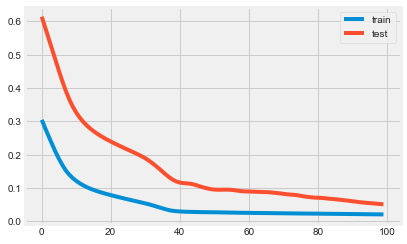

In [16]:
# design the network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mae', optimizer='adam') 
model1.summary()

# fit network
history = model1.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### **Testing** the LSTM Model with the test data and calculating **RMSE(Root Mean Square Error)**:

In [18]:
# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model1.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


(475, 1, 12)
(475, 1, 12)
15/15 [==============================] - 0s 1ms/step
Test RMSE: 2139.382


# Hence we observe RMSE of **2139.382**, i.e predicted prices can be off by 2139.382 units, and the built Hybrid model works excellently. 
## This is a pretty good RMSE, considering the sensex prices are in the order of 4 